In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd
from pandas import read_csv

# Set 2: Data and Background Analysis. Exclusions

### Observed Data and Background Model

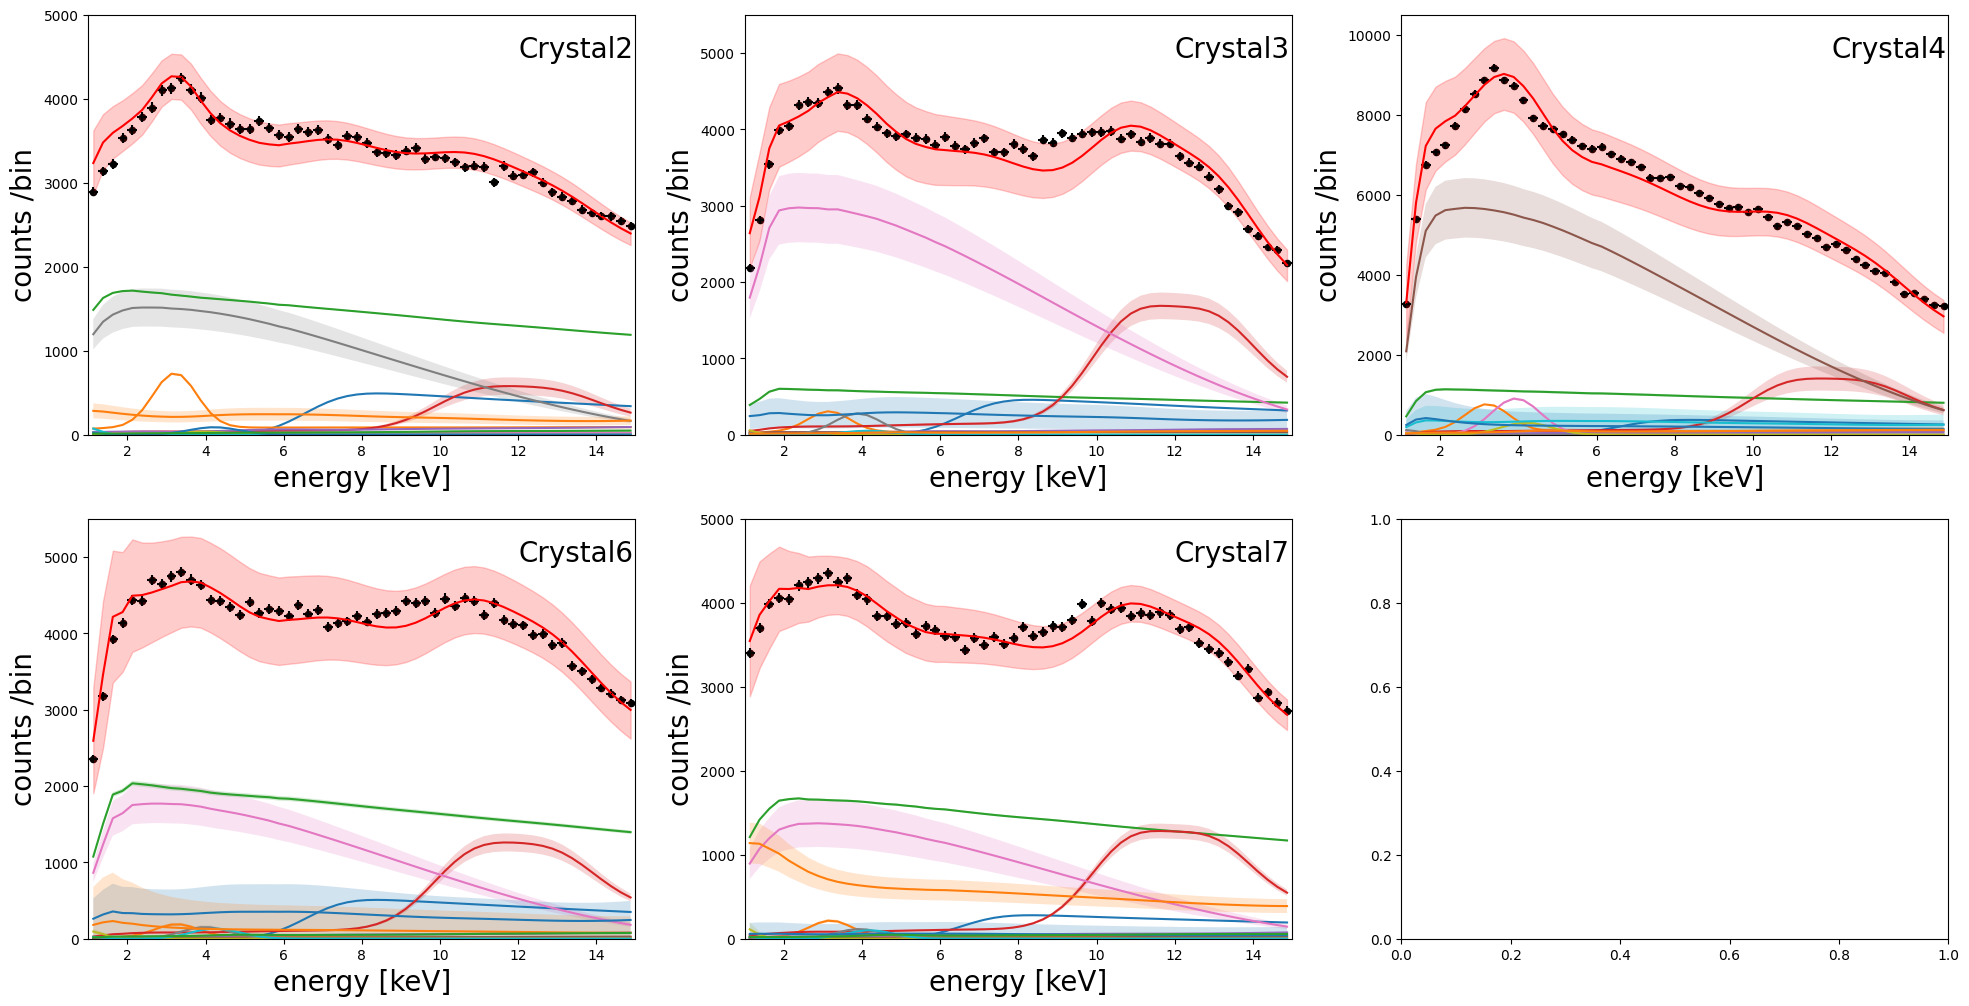

In [2]:
data  = []
model = []

for i in [2,3,4,6,7]:
    data.append(np.loadtxt('SET2/data/COSINE_SET2_Data_C{}.csv'.format(i), delimiter = ',',skiprows = 1))
    model.append(np.loadtxt('SET2/MC/COSINE_SET2_BackgroundModel_C{}.csv'.format(i), delimiter = ',',skiprows = 1))

ylim = [5000, 5500, 10500, 5500, 5000]
ic = [2, 3, 4, 6, 7]

fig, ax = plt.subplots(2, 3, figsize = (24, 12))
for i in range(5):
    ax[i//3,i%3].scatter (data[i][:,0], data[i][:,3], s = 20, c = 'k')
    ax[i//3,i%3].errorbar(data[i][:,0], data[i][:,3], xerr = 0.125, yerr = data[i][:,3]**0.5, fmt = ',', c = 'k')
    
    val = model[i][:,3]
    err_up = model[i][:,4]
    err_lw = model[i][:,5]
    ax[i//3,i%3].plot(model[i][:,0], val, 'r-')
    ax[i//3,i%3].fill_between(model[i][:,0], val-err_lw, val+err_up, color = 'r', alpha = 0.2)

    ncomp = (model[i][0].shape[0]-6)//2
    for j in range(ncomp):
        val = model[i][:,j+6]
        err = model[i][:,j+6+ncomp]
        ax[i//3,i%3].plot(model[i][:,0], val, '-')
        ax[i//3,i%3].fill_between(model[i][:,0], val - err, val + err, alpha = 0.2)
    ax[i//3,i%3].text(15*0.8, ylim[i]*0.9, r'Crystal{}'.format(ic[i]), fontsize = 20)
    
    ax[i//3,i%3].set_xlabel('energy [keV]', fontsize = 20)
    ax[i//3,i%3].set_ylabel('counts /bin', fontsize = 20)
    ax[i//3,i%3].set_xlim(1, 15)
    ax[i//3,i%3].set_ylim(0, ylim[i])

### Fit Results

(0.9, 1.1)

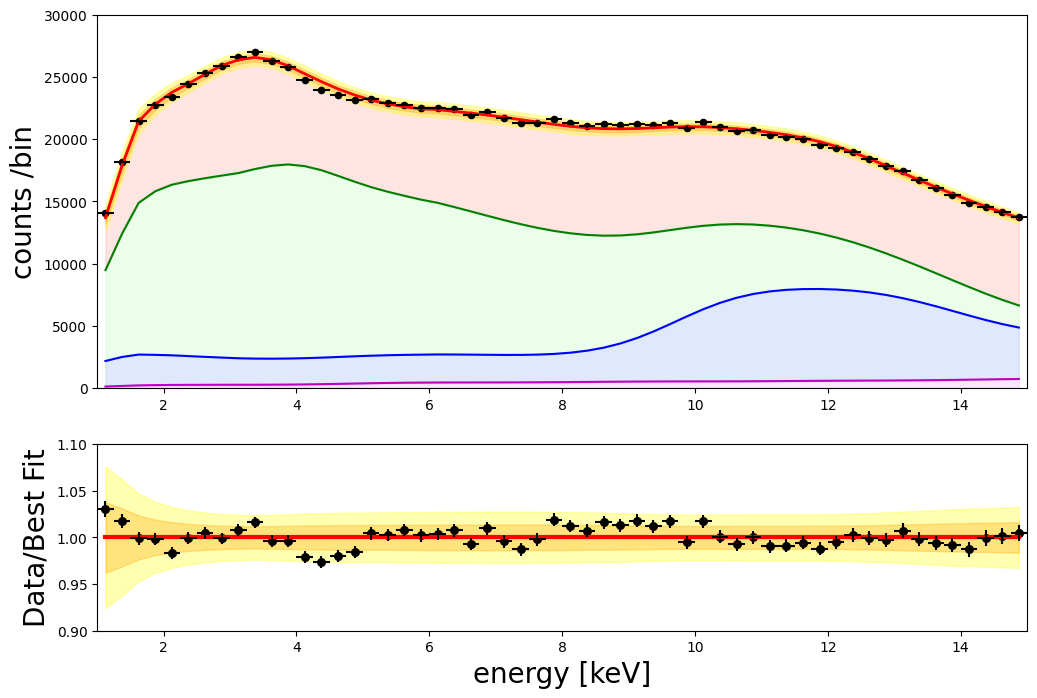

In [3]:
fit = []
fit.append(np.loadtxt('SET2/fit/fit_Result.csv', delimiter = ',',skiprows = 1))

fig, ax = plt.subplots(2, 1, figsize = (12, 8), gridspec_kw={'height_ratios':[2,1]})

background1 = fit[0][:,10]
background2 = fit[0][:,9] + fit[0][:,10]
background3 = fit[0][:,8] + fit[0][:,9] + fit[0][:,10]
background4 = fit[0][:,7] + fit[0][:,8] + fit[0][:,9] + fit[0][:,10]

ax[0].fill_between(fit[0][:,0], background1, alpha = 0.2, color = 'violet')
ax[0].fill_between(fit[0][:,0], background1, background2, alpha = 0.2, color = 'cornflowerblue')
ax[0].fill_between(fit[0][:,0], background2, background3, alpha = 0.2, color = 'palegreen')
ax[0].fill_between(fit[0][:,0], background3, background4, alpha = 0.2, color = 'salmon')

ax[0].plot(fit[0][:,0], background1, 'm-')
ax[0].plot(fit[0][:,0], background2, 'b-')
ax[0].plot(fit[0][:,0], background3, 'g-')

upper1 = fit[0][:,4] + fit[0][:,5]
lower1 = fit[0][:,4] - fit[0][:,6]
upper2 = fit[0][:,4] + fit[0][:,5]*2
lower2 = fit[0][:,4] - fit[0][:,6]*2

ax[0].fill_between(fit[0][:,0], lower2, upper2, color = 'yellow', alpha = 0.3)
ax[0].fill_between(fit[0][:,0], lower1, upper1, color = 'orange', alpha = 0.3)
ax[0].plot(fit[0][:,0], fit[0][:,4], 'r-', linewidth = 2)

ax[0].scatter(fit[0][:,0], fit[0][:,3], s = 20, c = 'k')
ax[0].errorbar(fit[0][:,0], fit[0][:,3], xerr = 0.125, yerr = fit[0][:,3]**0.5, fmt = ',', c = 'k')


ax[0].set_ylabel('counts /bin', fontsize = 20)
ax[0].set_xlim(1, 15)
ax[0].set_ylim(0, 30000)

upper_ratio2 = upper2/fit[0][:,4]
lower_ratio2 = lower2/fit[0][:,4]
upper_ratio1 = upper1/fit[0][:,4]
lower_ratio1 = lower1/fit[0][:,4]

ax[1].fill_between(fit[0][:,0], lower_ratio2, upper_ratio2, color = 'yellow', alpha = 0.3)
ax[1].fill_between(fit[0][:,0], lower_ratio1, upper_ratio1, color = 'orange', alpha = 0.3)
ax[1].plot(fit[0][:,0], fit[0][:,4]/fit[0][:,4], 'r-', linewidth = 3)

ax[1].scatter(fit[0][:,0], fit[0][:,3]/fit[0][:,4], s = 30, c = 'k')
ax[1].errorbar(fit[0][:,0], fit[0][:,3]/fit[0][:,4], xerr = 0.125, yerr = fit[0][:,3]**0.5/fit[0][:,4], fmt = ',', c = 'k')

ax[1].set_xlabel('energy [keV]', fontsize = 20)
ax[1].set_ylabel('Data/Best Fit', fontsize = 20)
ax[1].set_xlim(1, 15)
ax[1].set_ylim(0.9, 1.1)

### Exclusions

(2e-05, 10.0)

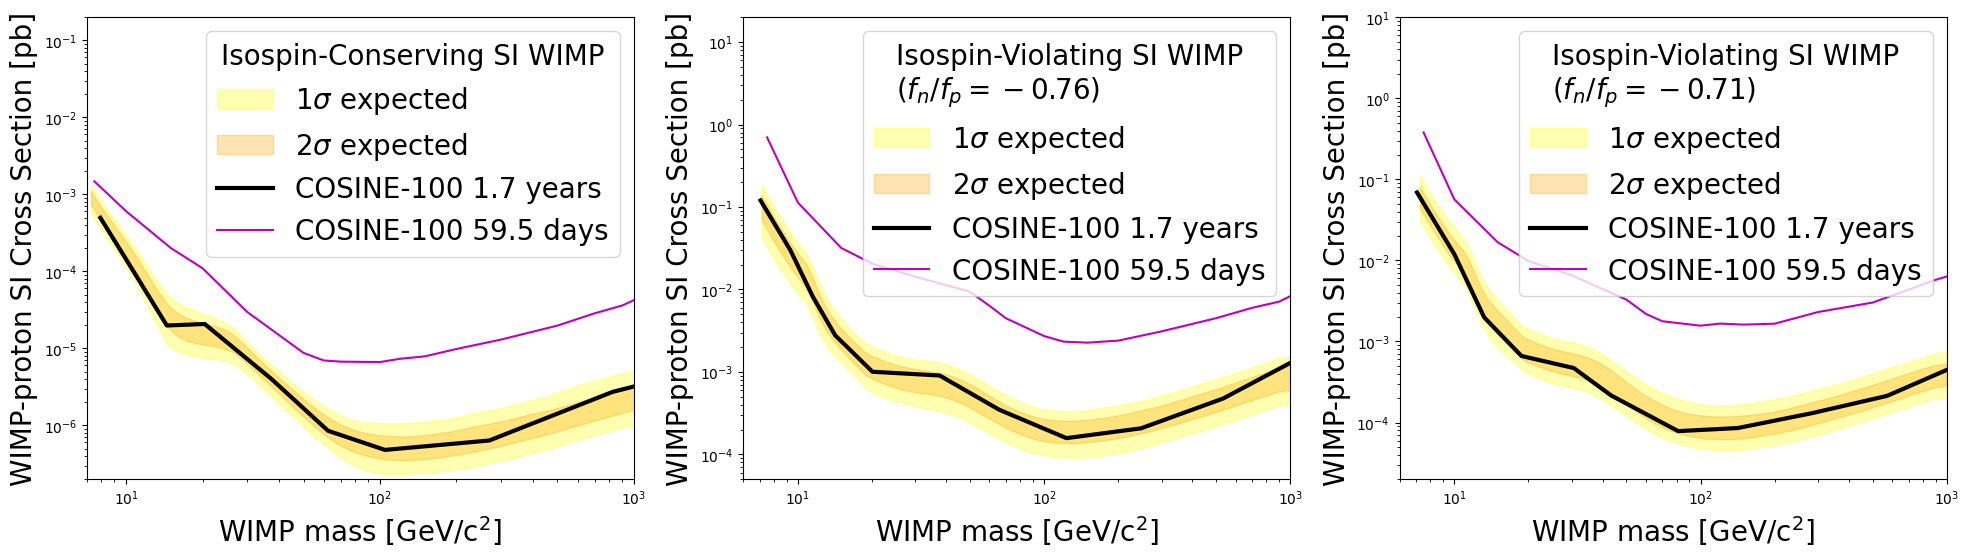

In [4]:
limit_set2_icsi = []
limit_set2_ivsi1 = []
limit_set2_ivsi2 = []

limit_set2_icsi.append(np.loadtxt('SET2/limit/COSINE_SET2_Limit_Isospin-Conserving_SI_WIMP.csv', delimiter = ',',skiprows = 1))
limit_set2_ivsi1.append(np.loadtxt('SET2/limit/COSINE_SET2_Limit_Isospin-Violating_SI_WIMP_fnfp-076.csv', delimiter = ',',skiprows = 1))
limit_set2_ivsi2.append(np.loadtxt('SET2/limit/COSINE_SET2_Limit_Isospin-Violating_SI_WIMP_fnfp-071.csv', delimiter = ',',skiprows = 1))

sensi_set2_icsi = []
sensi_set2_ivsi1 = []
sensi_set2_ivsi2 = []

sensi_set2_icsi.append(np.loadtxt('SET2/limit/COSINE_SET2_Sensitivity_Isospin-Conserving_SI_WIMP.csv', delimiter = ',',skiprows = 1))
sensi_set2_ivsi1.append(np.loadtxt('SET2/limit/COSINE_SET2_Sensitivity_Isospin-Violating_SI_WIMP_fnfp-076.csv', delimiter = ',',skiprows = 1))
sensi_set2_ivsi2.append(np.loadtxt('SET2/limit/COSINE_SET2_Sensitivity_Isospin-Violating_SI_WIMP_fnfp-071.csv', delimiter = ',',skiprows = 1))

limit_set1_icsi = []
limit_set1_ivsi1 = []
limit_set1_ivsi2 = []

limit_set1_icsi.append(np.loadtxt('SET2/limit/COSINE_SET1_Limit_Isospin-Conserving_SI_WIMP.csv', delimiter = ',',skiprows = 1))
limit_set1_ivsi1.append(np.loadtxt('SET2/limit/COSINE_SET1_Limit_Isospin-Violating_SI_WIMP_fnfp-076.csv', delimiter = ',',skiprows = 1))
limit_set1_ivsi2.append(np.loadtxt('SET2/limit/COSINE_SET1_Limit_Isospin-Violating_SI_WIMP_fnfp-071.csv', delimiter = ',',skiprows = 1))

fig, ax = plt.subplots(1, 3, figsize = (24, 6))

ax[0].fill_between(sensi_set2_icsi [0][:,0], sensi_set2_icsi [0][:,3], sensi_set2_icsi [0][:,4], alpha = 0.3, color = 'yellow', label = '1$\sigma$ expected')
ax[0].fill_between(sensi_set2_icsi [0][:,0], sensi_set2_icsi [0][:,1], sensi_set2_icsi [0][:,2], alpha = 0.3, color = 'orange', label = '2$\sigma$ expected')
ax[1].fill_between(sensi_set2_ivsi1[0][:,0], sensi_set2_ivsi1[0][:,3], sensi_set2_ivsi1[0][:,4], alpha = 0.3, color = 'yellow', label = '1$\sigma$ expected')
ax[1].fill_between(sensi_set2_ivsi1[0][:,0], sensi_set2_ivsi1[0][:,1], sensi_set2_ivsi1[0][:,2], alpha = 0.3, color = 'orange', label = '2$\sigma$ expected')
ax[2].fill_between(sensi_set2_ivsi2[0][:,0], sensi_set2_ivsi2[0][:,3], sensi_set2_ivsi2[0][:,4], alpha = 0.3, color = 'yellow', label = '1$\sigma$ expected')
ax[2].fill_between(sensi_set2_ivsi2[0][:,0], sensi_set2_ivsi2[0][:,1], sensi_set2_ivsi2[0][:,2], alpha = 0.3, color = 'orange', label = '2$\sigma$ expected')

ax[0].plot(limit_set2_icsi [0][:,0], limit_set2_icsi [0][:,1], c = 'k', linewidth = 3, label = 'COSINE-100 1.7 years')
ax[1].plot(limit_set2_ivsi1[0][:,0], limit_set2_ivsi1[0][:,1], c = 'k', linewidth = 3, label = 'COSINE-100 1.7 years')
ax[2].plot(limit_set2_ivsi2[0][:,0], limit_set2_ivsi2[0][:,1], c = 'k', linewidth = 3, label = 'COSINE-100 1.7 years')

ax[0].plot(limit_set1_icsi [0][:,0], limit_set1_icsi [0][:,1], c = 'm', label = 'COSINE-100 59.5 days')
ax[1].plot(limit_set1_ivsi1[0][:,0], limit_set1_ivsi1[0][:,1], c = 'm', label = 'COSINE-100 59.5 days')
ax[2].plot(limit_set1_ivsi2[0][:,0], limit_set1_ivsi2[0][:,1], c = 'm', label = 'COSINE-100 59.5 days')

leg1 = ax[0].legend(title = 'Isospin-Conserving SI WIMP', fontsize = 20)
leg2 = ax[1].legend(title = 'Isospin-Violating SI WIMP\n($f_n/f_p = -0.76$)', fontsize = 20)
leg3 = ax[2].legend(title = 'Isospin-Violating SI WIMP\n($f_n/f_p = -0.71$)', fontsize = 20)
leg1.get_title().set_fontsize(20)
leg2.get_title().set_fontsize(20)
leg3.get_title().set_fontsize(20)

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('WIMP mass [GeV/c$^2$]', fontsize = 20)
ax[0].set_ylabel('WIMP-proton SI Cross Section [pb]', fontsize = 20)
ax[0].set_xlim(7, 1000)
ax[0].set_ylim(2e-7, 2e-1)

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('WIMP mass [GeV/c$^2$]', fontsize = 20)
ax[1].set_ylabel('WIMP-proton SI Cross Section [pb]', fontsize = 20)
ax[1].set_xlim(6, 1000)
ax[1].set_ylim(5e-5, 2e1)

ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xlabel('WIMP mass [GeV/c$^2$]', fontsize = 20)
ax[2].set_ylabel('WIMP-proton SI Cross Section [pb]', fontsize = 20)
ax[2].set_xlim(6, 1000)
ax[2].set_ylim(2e-5, 1e1)


# Set 3: Modulation Analysis

### Average background spectrum from 1-40 keV and its component extracted from modelling

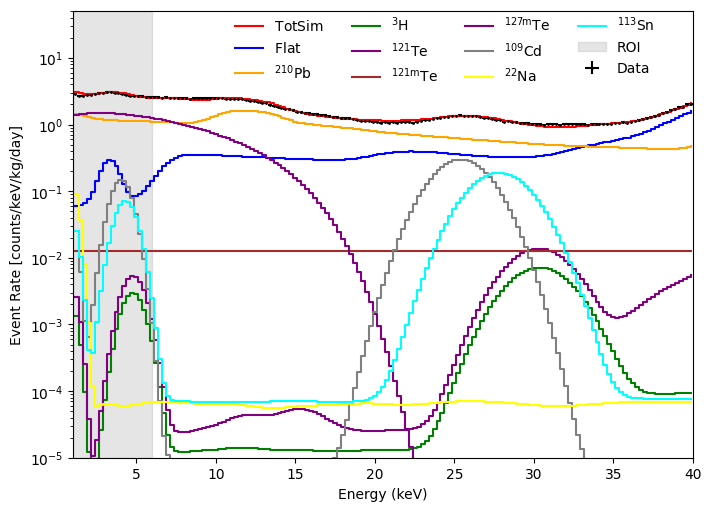

In [5]:
bkgd_models = pd.read_csv('SET3/average_event_rate_all_crystals_single_hit_1-40keV.csv')

xVal     = bkgd_models.iloc[:,0]
dataVal  = bkgd_models.iloc[:,3]
dataErr  = bkgd_models.iloc[:,4]
sim_plt  = {}

y_cols = [5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
colors    = ['red', 'blue', 'orange', 'green', 'purple',  'brown', 'purple', 'grey', 'yellow', 'cyan']
bkgd_name = [ 'TotSim', 'Flat', 'Pb' , 'H', 'Te' , 'Te'  , 'Te'  , 'Cd' , 'Na', 'Sn' ]
bkgd_num  = [ ''      , ''    , '210', '3', '121','121m', '127m',  '109', '22', '113']

fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
data_plt  = ax.errorbar(xVal, dataVal, xerr=0.25/2, yerr=dataErr,  fmt='ok', ms=1, label='Data')


for i, y_col in enumerate(y_cols):
     simVal = bkgd_models.iloc[:, y_col]
     sim_plt = ax.step(xVal, simVal, where='post', color=colors[i], label='$^{\mathrm{' + bkgd_num[i] + '}}$' + bkgd_name[i] )

ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Event Rate [counts/keV/kg/day]')
ax.set_ylim(bottom=1e-5, top=50)
ax.set_xlim((1,40))
ax.axvspan(1,6, alpha=0.2, color='gray', label='ROI')
ax.set_yscale('log')
#ax.set_title('Average Event Rate of All Crystals Single Hit 1-40 keV')
ax.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.6, 1.02), frameon=False)
plt.show()

### Event rate and fitted results

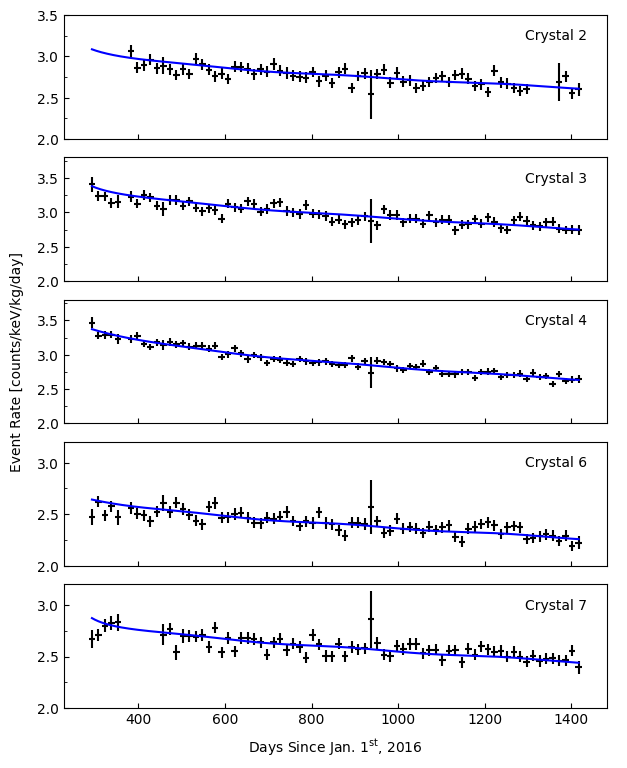

In [6]:
##### Event rate and fitted results
crystal_id = {2:0  , 3:1  , 4:2  , 6:3  , 7:4  }
ylim       = [3.5, 3.8, 3.8, 3.2, 3.2]
data       = []
start_days = []
dru_rates  = []
dru_errs   = []
bin_width  = 15 ## in days
all_total_model_over_time = []
data_df_list = []

#read set3 event rate
for i in crystal_id:
    data.append(np.loadtxt('SET3/event_rate_Crystal-{}_set3_single_hit_1-6keV.csv'.format(i), delimiter = ',',skiprows = 1))
for i in range(5):
        start_days.append(data[i][:,0])
        dru_rates .append(data[i][:,3])
        dru_errs  .append(data[i][:,4])
 

## read fit results of all crystals
fname1 = ('SET3/fit_result_Crystal-{}_set3_single_hit_1-6keV.csv')
for xtal, index in crystal_id.items():
    df = pd.read_csv(fname1.format(xtal))
    df['xtal'] = xtal
    data_df_list.append(df)
data_df1 = pd.concat(data_df_list)

#read decay constant of each component [210Pb, 121Te, 121mTe, 127m, Te127, 3H, 109Cd, 22Na, 113Sn]
data_df2 = pd.read_csv('SET3/decay_constant_time_dependent_background_all_Crystal.csv')

for xtal, index in crystal_id.items():
    df        = data_df1.query('xtal == {}'.format(xtal))
    mod_Val   = df.iloc[0, 0]
    flat_Val  = df.iloc[0, 2]
    bkgd_Vals = df.iloc[0:8, 4].values## values corresponding to the initial amplitude of a given background component
    bkgd_Vals = np.expand_dims(bkgd_Vals, axis=1)

    decayConst    = data_df2['decay_rate'].values ## decay constant
    first_element = start_days[0][0] ## corresponds to 
    last_element  = start_days[-1][-1]
    time_Val      = np.linspace(first_element, last_element, 1000)

    mod_over_time       = mod_Val * np.cos(2*np.pi/365.25 * (time_Val-152.5))
    flat_bkgd_over_time = np.full(time_Val.size, flat_Val)
    exp_bkgds_over_time = np.exp(-1*np.outer(decayConst, time_Val-295)) * bkgd_Vals ## 295 corresponds to the start date of 21st Oct 2016

    total_model_over_time =  flat_bkgd_over_time  + np.sum(exp_bkgds_over_time, axis=0) + mod_over_time
    all_total_model_over_time.append(total_model_over_time)


 
# Draw
fig = plt.figure(figsize=(7, 9))
ax = fig.add_subplot(111)
axs = {}
for i, key in enumerate(crystal_id):
	axs[key] = fig.add_subplot(len(crystal_id),1,i+1)
	axs[key].errorbar(start_days[i], dru_rates[i], xerr=bin_width/2, yerr=dru_errs[i], fmt='none', ecolor='k')
	axs[key].plot(time_Val, all_total_model_over_time[i], 'b')
	axs[key].yaxis.set_major_locator(MultipleLocator(0.5))
	axs[key].yaxis.set_minor_locator(AutoMinorLocator(2))
	axs[key].tick_params(which='both', direction='in')
	axs[key].set_ylim(2.0, ylim[i])
	if key != 7:
		axs[key].axes.xaxis.set_ticklabels([])
	axs[key].text(0.85, 0.8, f'Crystal {key}', transform = axs[key].transAxes)


# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_xlabel('Days Since Jan. $\mathrm{1^{st}}$, 2016')
ax.set_ylabel('Event Rate [counts/keV/kg/day]', labelpad=6)
fig.subplots_adjust(hspace=0.15)

plt.show()

### Modulation amplitude as a function of energy

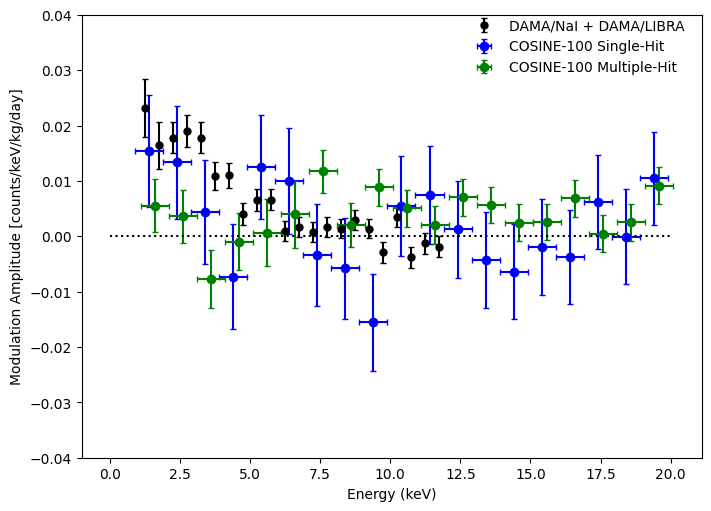

In [7]:
dama_rslt        = pd.read_csv('SET3/dama_energy_modulation_amplitude_single.csv')
cosine_set3_rslt = pd.read_csv('SET3/cosine_set3_energy_modulation_amplitude.csv')

damaBin = dama_rslt.iloc[:,0]+0.25
set3Bin = cosine_set3_rslt.iloc[:,0]+0.5

damaAmp           = dama_rslt.iloc[:,2]
damaAmpErr        = dama_rslt.iloc[:,3]
set3AmpSing       = cosine_set3_rslt.iloc[:,2]
set3AmpSingErrLow = cosine_set3_rslt.iloc[:,3]
set3AmpSingErrUp  = cosine_set3_rslt.iloc[:,4]
set3AmpMul        = cosine_set3_rslt.iloc[:,5]
set3AmpMulErrLow  = cosine_set3_rslt.iloc[:,6]
set3AmpMulErrUp   = cosine_set3_rslt.iloc[:,7]


colors    = ['black', 'blue', 'green']
data_name = ['DAMA/NaI + DAMA/LIBRA', 'COSINE-100 Single Hit', 'Cosine-100 Multiple Hit']

offset = 0.1
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
amp_plt = ax.errorbar(damaBin, damaAmp, yerr=damaAmpErr, fmt='ok', ms=5, capsize=2,  label='DAMA/NaI + DAMA/LIBRA')
ax.errorbar(set3Bin-offset, set3AmpSing, xerr=1.0/2, yerr=[set3AmpSingErrLow,set3AmpSingErrUp], fmt='ob', ms=6, capsize=2,  label='COSINE-100 Single-Hit')
ax.errorbar(set3Bin+offset, set3AmpMul , xerr=1.0/2, yerr=[set3AmpMulErrLow ,set3AmpMulErrUp] , fmt='og', ms=6, capsize=2,  label='COSINE-100 Multiple-Hit')


ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Modulation Amplitude [counts/keV/kg/day]')
ax.set_ylim(-0.04, 0.04)
ax.hlines(0, 0, 20, colors='k', linestyles='dotted')
ax.legend(loc='upper center', ncol=1, bbox_to_anchor=(0.8, 1.02), frameon=False)
plt.show()